In [19]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## przygotowanie tabeli z danymi

In [20]:
df1 = pd.read_csv('wyniki.csv', names=['bci_type','classifier','scaling','variation','mutation_prob'
                                      ,'num_of_gen','gen_size','individual','accuracy'])
# df = pd.read_csv('MCSB_wyniki.csv', names=['bci_type','classifier','scaling','variation','mutation_prob'
#                                       ,'num_of_gen','gen_size','individual','accuracy'])

In [21]:
df.head()

,bci_type,classifier,scaling,variation,mutation_prob,num_of_gen,gen_size,individual,accuracy,prep
0,learning,svm,True,False,0.01,100,30,1011001001010001000001100100111100011011000101...,0.829268,nothing
1,learning,svm,True,False,0.01,100,30,0100100001100100111001110001110101010000000110...,0.850000,nothing
2,learning,svm,True,False,0.01,100,30,1001110100000100100100101000010000110100001101...,0.779412,nothing
3,learning,svm,True,False,0.01,100,30,0110010101100000001101000001000101010001000000...,0.833333,nothing
4,learning,svm,True,False,0.01,100,30,0000110100000011010011110101100000001000000000...,0.638889,nothing


In [22]:
# add column with preprocessing 
a = ['nothing' for i in range(160)]
b = ['norm' for i in range(160)]
c = ['ICA' for i in range(200)]
new_col = a+b+c
df1['prep'] = new_col
df1.head()

,bci_type,classifier,scaling,variation,mutation_prob,num_of_gen,gen_size,individual,accuracy,prep
0,learning,svm,True,False,0.01,100,30,1011001001010001000001100100111100011011000101...,0.829268,nothing
1,learning,svm,True,False,0.01,100,30,0100100001100100111001110001110101010000000110...,0.850000,nothing
2,learning,svm,True,False,0.01,100,30,1001110100000100100100101000010000110100001101...,0.779412,nothing
3,learning,svm,True,False,0.01,100,30,0110010101100000001101000001000101010001000000...,0.833333,nothing
4,learning,svm,True,False,0.01,100,30,0000110100000011010011110101100000001000000000...,0.638889,nothing


In [23]:
# change values in classifier column
df1.iloc[480:,1].replace('svm', 'poly_svm', inplace=True)

In [24]:
df2 = pd.read_csv('wyniki2.csv', names=['bci_type','classifier','scaling','variation','mutation_prob'
                                      ,'num_of_gen','gen_size','individual','accuracy'])

In [25]:
# add column with preprocessing 
df2['prep'] = ['ICA' for i in range(40)]+['nothing' for i in range(40)]

In [26]:
df2.head()

,bci_type,classifier,scaling,variation,mutation_prob,num_of_gen,gen_size,individual,accuracy,prep
0,learning,lin_svm,True,False,0.01,100,30,0011001001010000101100000001000110011011001100...,0.787500,ICA
1,learning,lin_svm,True,False,0.01,100,30,1011011100001001010010110110100101000011111000...,0.525641,ICA
2,learning,lin_svm,True,False,0.01,100,30,0010001110000000010000101100110111000111011100...,0.750000,ICA
3,learning,lin_svm,True,False,0.01,100,30,1010001110011000010011000110000000001100011001...,0.823529,ICA
4,learning,lin_svm,True,False,0.01,100,30,0011100100100101100100010000101111000001000011...,0.684211,ICA


In [27]:
# połączone dane ze wszystkich testów z 2 plików
df = pd.concat([df1, df2])
df.shape

(600, 10)

# przegląd wyników

In [30]:
# skalowanie danych przed klasyfikacją pomaga
df.groupby(['scaling']).agg(['mean','min','max','std','count'])['accuracy']

,mean,min,max,std,count
scaling,,,,,
False,0.654193,0.012195,0.893617,0.117440,240
True,0.731589,0.136364,0.950000,0.092068,360


In [29]:
df.groupby(['classifier','scaling']).agg(['mean','min','max','std','count'])['accuracy']

mean       min       max       std  count
classifier scaling                                               
knn        False    0.657359  0.339286  0.893617  0.104386    120
           True     0.747755  0.560606  0.893258  0.074139    120
lin_svm    True     0.735437  0.442857  0.902439  0.088707     40
poly2_svm  True     0.672126  0.454545  0.825000  0.090326     40
poly_svm   True     0.665107  0.136364  0.860759  0.115421     40
svm        False    0.651028  0.012195  0.882353  0.129552    120
           True     0.756123  0.465517  0.950000  0.083107    120

In [31]:
df.groupby(['classifier']).agg(['mean', 'count'])['accuracy']

,mean,count
classifier,,
knn,0.702557,240
lin_svm,0.735437,40
poly2_svm,0.672126,40
poly_svm,0.665107,40
svm,0.703575,240


In [33]:
# średnia z 10 testów dla każdego warunku
# df.groupby(['prep','bci_type','classifier','scaling','mutation_prob']).agg(['mean', 'count'])['accuracy']
df.groupby(['bci_type','classifier','prep','scaling','mutation_prob']).agg(['mean','min','max','std', 'count'])['accuracy']

mean       min  \
bci_type classifier prep    scaling mutation_prob                       
learning knn        ICA     False   0.01           0.576090  0.471429   
                                    0.02           0.536927  0.339286   
                            True    0.01           0.802069  0.651515   
                                    0.02           0.704642  0.578947   
                    norm    False   0.01           0.614113  0.513514   
                                    0.02           0.688992  0.597222   
                            True    0.01           0.725233  0.617647   
                                    0.02           0.751909  0.657895   
                    nothing False   0.01           0.769576  0.661765   
                                    0.02           0.715344  0.550000   
                            True    0.01           0.708652  0.560606   
                                    0.02           0.775546  0.633333   
         lin_svm    ICA     True    0.01           0.679700  0.442857   
                    nothing True    0.01           0.747433  0.625000   
         poly2_svm  ICA     True    0.01           0.667651  0.454545   
                    nothing True    0.01           0.624968  0.560606   
         poly_svm   ICA     True    0.01           0.619772  0.136364   
                                    0.02           0.658652  0.500000   
         svm        ICA     False   0.01           0.627430  0.560606   
                                    0.02           0.567778  0.340000   
                            True    0.01           0.768017  0.621212   
                                    0.02           0.728492  0.518519   
                    norm    False   0.01           0.580569  0.016129   
                                    0.02           0.524226  0.012195   
                            True    0.01           0.714764  0.465517   
                                    0.02           0.726295  0.621212   
                    nothing False   0.01           0.760062  0.617647   
                                    0.02           0.752144  0.546875   
                            True    0.01           0.747309  0.575758   
                                    0.02           0.751843  0.596154   
withdraw knn        ICA     False   0.01           0.613778  0.551136   
                                    0.02           0.584515  0.456522   
                            True    0.01           0.748934  0.639535   
                                    0.02           0.728487  0.672414   
                    norm    False   0.01           0.651246  0.598901   
                                    0.02           0.616681  0.477528   
                            True    0.01           0.746085  0.651961   
                                    0.02           0.763586  0.662651   
                    nothing False   0.01           0.750576  0.685567   
                                    0.02           0.770467  0.652632   
                            True    0.01           0.750733  0.646739   
                                    0.02           0.767182  0.656863   
         lin_svm    ICA     True    0.01           0.761278  0.646465   
                    nothing True    0.01           0.753337  0.635417   
         poly2_svm  ICA     True    0.01           0.716894  0.600000   
                    nothing True    0.01           0.678990  0.531579   
         poly_svm   ICA     True    0.01           0.690487  0.612745   
                                    0.02           0.691518  0.573684   
         svm        ICA     False   0.01           0.597029  0.523364   
                                    0.02           0.605264  0.485294   
                            True    0.01           0.808188  0.689320   
                                    0.02           0.745328  0.625000   
                    norm    False   0.01           0.670144  0.567416   
                                    0.02

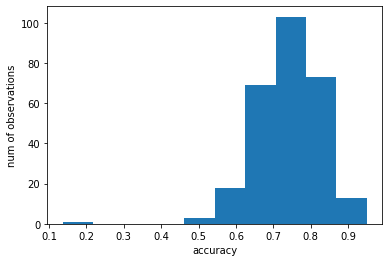

In [53]:
scale_true = df[df['scaling']==True]['accuracy']
scale_false = df[df['scaling']==False]['accuracy']
plt.hist(scale_true)
plt.xlabel('accuracy')
plt.ylabel('num of observations')
plt.show()

In [59]:
# rozkład według testów nie jest normalny
stats.shapiro(scale_true)

ShapiroResult(statistic=0.936590313911438, pvalue=1.358799073258865e-09)

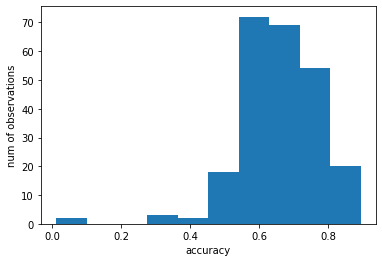

In [57]:
plt.hist(scale_false)
plt.xlabel('accuracy')
plt.ylabel('num of observations')
plt.show()

In [61]:
# test na jednorodność wariancji
stats.levene(scale_true,scale_false)
# mann-whitney/kruskal

LeveneResult(statistic=7.378208174625773, pvalue=0.006822573126600617)

In [62]:
# test t dla niejednorodnych wariancji
stats.ttest_ind(scale_true,scale_false,equal_var=False)

Ttest_indResult(statistic=9.182528983569192, pvalue=1.6159396894598404e-18)